## Prediction  of Student's scores using Supervised ML
### Author
 #### Asha Nair,The Sparks Foundation

As a part of my internship with The Sparks Foundation, I have been tasked to predict the  marks scored by students based on the number of hours they study. The dataset provided has two columns, Scores and Number of hours they study. 

#### Problem Statement: 


To predict the exam scores when a student studies 9.25 hours a day.


### Steps Involved:

1. Data Reading and Understanding
2. Exploratory Data Analysis
3. Building a Simple Linear Regression Model
4. Model Evaluation

### 1. Data Reading and Understanding

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [4]:
ss=pd.read_csv("student_scores - student_scores.csv")
ss.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
ss.shape

(25, 2)

In [60]:
ss.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
ss.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# Find missing values:

ss.isnull().sum()

Hours     0
Scores    0
dtype: int64

### 2. Exploratory Data Analysis

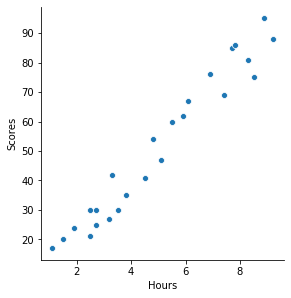

In [8]:
sns.pairplot(ss, x_vars=['Hours'], y_vars='Scores',size=4, aspect=1, kind='scatter')
plt.show()


The plot suggests linearity in data

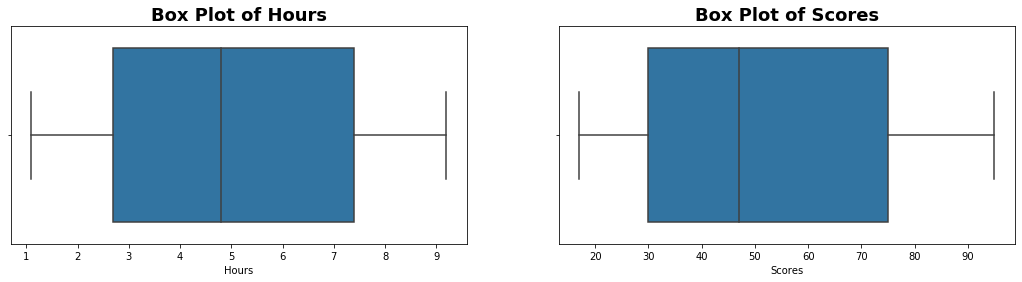

In [10]:
# Univariate analysis
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
sns.boxplot(x = 'Hours', data = ss)
plt.title('Box Plot of Hours', fontweight = 'bold', fontsize = 18)
plt.subplot(1,2,2)
sns.boxplot(x = 'Scores', data = ss)
plt.title('Box Plot of Scores',fontweight = 'bold', fontsize = 18)

plt.show()

There are no outliers present in the dataset.

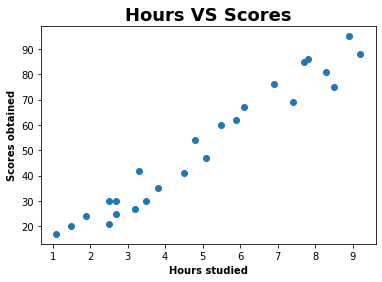

In [11]:

plt.scatter(x = 'Hours', y = 'Scores' , data = ss)
plt.xlabel('Hours studied', fontweight = 'bold')
plt.ylabel('Scores obtained', fontweight = 'bold')
plt.title('Hours VS Scores', fontweight = 'bold', fontsize = 18)
plt.show()

Both the features, 'hours' and Scores have a linear relationship . Therefore a model using linear regression can be developed.

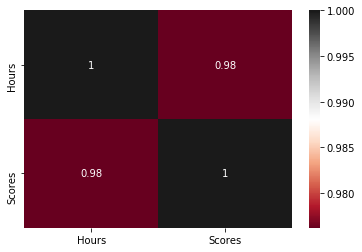

In [14]:
sns.heatmap(ss.corr(), cmap="RdGy", annot = True)
plt.show()

The heatmap shows strong positive correlation betwwen hours and scores.

### 3. Modelling: Simple Linear Regression

Equation of linear regression
y = c + m_1x_1 + m_2x_2 + ... + m_nx_n

y is the response
c is the intercept
m_1 is the coefficient for the first feature
m_n is the coefficient for the nth feature
In our case:

Scores = c + m_1 X Hours

The m values are called the model coefficients or model parameters.

### First split the dataset into train and test data

This will be performed by importing train_test_split from the sklearn.model_selection library. It is usually a good practice to keep 70% of the data in the train dataset and the rest 30% in the test dataset

In [16]:
# Creating X and Y sets 
X = ss['Hours']
y = ss['Scores']

In [20]:
# Performing test train split with 70-30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test,  y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state = 100)

In [21]:
# Checking the shapes for all the sets
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (17,)
X_test:  (8,)
y_train:  (17,)
y_test:  (8,)


#### Build the linear model using StatsModels

By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, the add_constant attribute of statsmodels has to be used manually. And once it is added to the X_train dataset,a  a regression line can be fit using the OLS (Ordinary Least Squares) attribute of statsmodels as shown below:

In [23]:
import statsmodels.api as sm
# Adding constant
X_train_sm = sm.add_constant(X_train)
# Buidling and fitting the model
lr_model = sm.OLS(y_train, X_train_sm).fit()
# Checking the models parameters
lr_model.params

const    1.495142
Hours    9.871714
dtype: float64

In [24]:

# Printing the model summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Mon, 21 Dec 2020   Prob (F-statistic):           1.15e-11
Time:                        19:01:12   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4951      3.169      0.472      0.6

<b>The p - value for Hours is significant as the p value is less than 0.05 and the r-square is 95.7%.</b>

From the parameters that we get, the linear regression equation becomes:

<b>Scores = 1.4951+9.8717 X Hours</b>

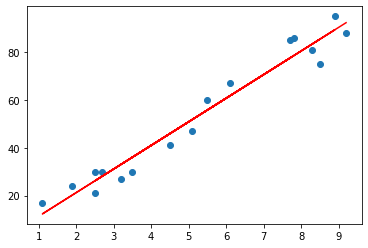

In [58]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 1.4951+9.8717*X_train, 'r')
plt.show()

#### Model Training using SK Learn

In [30]:
# Reshaping X train set
X_train = X_train.values.reshape(-1,1)

In [32]:
# Building the model using SK Learn package
from sklearn.linear_model import LinearRegression
lr_model_sk = LinearRegression().fit(X_train,y_train)

In [33]:
# Displaying model parameters
print('Intercept of line: ',lr_model_sk.intercept_)
print('Coefficent of Hours: ',lr_model_sk.coef_)

Intercept of line:  1.495142109236383
Coefficent of Hours:  [9.87171443]


In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Checking r - square of sklearn model
y_train_pred = lr_model_sk.predict(X_train)
r2score_train = r2_score(y_true=y_train, y_pred=y_train_pred)
print('R2_score using sklearn model: ', (r2score_train)*100)

R2_score using sklearn model:  95.70735354094693


<b> The results generated from statsmodels and sklearn are the same.</b>

###  Residual analysis

Purpose: To validate the assumptions of a linear regression model

1. The error terms are normally distributed
2. The error terms should not be dependent on each other

In [36]:
#Error terms 
res = y_train - y_train_pred

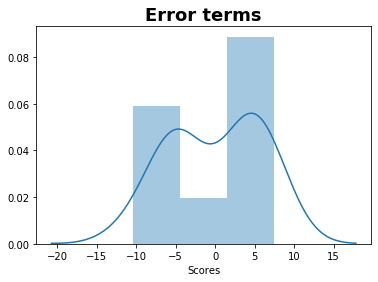

In [37]:
sns.distplot(res)
plt.title('Error terms',fontweight = 'bold', fontsize = 18)
plt.show()

The data is normally distributed. It looks like a non-normal distribution but actually the distribution suggests two seperate processes overlapping with each having a normal distribution. These two processes could mean two groups of students in the data-The left one unprepared and the right one-prepared with high scores. 

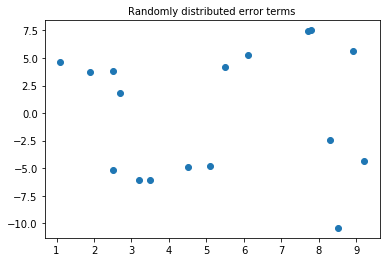

In [53]:
# Check for independence of error terms

plt.scatter(X_train, res)
plt.title('Randomly distributed error terms', fontsize = 10)
plt.show()

The error terms do not follow a specific pattern and are independent of each other.

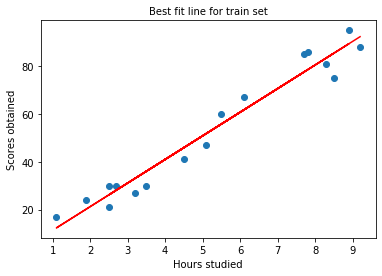

In [38]:
#Visualizing the fit on the train set
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, 'r')
plt.xlabel('Hours studied')
plt.ylabel('Scores obtained')
plt.title('Best fit line for train set', fontsize = 10)
plt.show()


### Predictions on the test set

Now that a regression line is fit on the train dataset, it's time to make some predictions on the test data. For this,first a constant needs to be added to the X_test data like it was done for X_train and then the y values corresponding to X_test can be predicted using the predict attribute of the fitted regression line.

#### Predictions using stats model

In [40]:

# Adding constant to X test set
X_test_sm = sm.add_constant(X_test)
# Making predictions on the trained stats model
y_test_pred = lr_model.predict(X_test_sm)

In [41]:
# Checking the r- squared on the test set using stats model
r2score = r2_score(y_true=y_test, y_pred=y_test_pred)
print('R2_score of test set using stats model: ', (r2score)*100)

R2_score of test set using stats model:  93.09458862687438


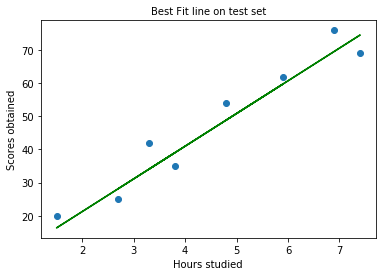

In [55]:
#Visualizing the fit on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'g')
plt.xlabel('Hours studied')
plt.ylabel('Scores obtained')
plt.title('Best Fit line on test set', fontsize = 10)
plt.show()


#### Predictions using SK learn

In [43]:
# Reshaping the X test set
X_test = X_test.values.reshape(-1,1)

In [44]:
# Making predictions using sklearn
y_test_pred_sk = lr_model_sk.predict(X_test)

In [45]:
predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted' : y_test_pred_sk})
predicted_df

,Actual,Predicted
9,25,28.148771
22,35,39.007657
13,42,34.071800
11,62,59.738257
5,20,16.302714
19,69,74.545829
23,76,69.609972
21,54,48.879371


### 4. Model Evaluation

In [46]:
# Checking the r- squared on the test set using sklearn model
r2score = r2_score(y_true=y_test, y_pred=y_test_pred_sk)
print('R2_score of test set using SK Learn model: ', (r2score)*100)

R2_score of test set using SK Learn model:  93.09458862687437


**Conclusion:` The R-square on the train set was 95.7%, whereas on the test set it is 93.09% which is acceptable. Hence, this model is performing well i.e. it has generalised on the test data well.**

### 5. Final Solution

In [52]:
# Expected score of a student if they study for 9.25 hours

hours=np.array(9.25).reshape(1,-1)
pred=lr_model_sk.predict(hours)

print("If a student studies for 9.25 hours, they are expected to score {}".format(red))

If a student studies for 9.25 hours, they are expected to score [92.80850057]


### 6. Conclusion

#### A student studying 9.25 hours is expected to score 92.8 marks